<img src="./logo_UNSAM.jpg" align="right" width="150" /> 

#### Análisis y Procesamiento de Señales

# Trabajo Semanal Nº2
#### Lucas Douat

## Introduccion

En esta práctica se estudian sistemas lineales invariantes en el tiempo (LTI) mediante su representación en diferencias. Se analiza la respuesta al impulso, la salida ante distintas señales de entrada.

Se utiliza la función `scipy.signal.lfilter` para aplicar la ecuación en diferencias y un algoritmo que evalua condiciones que representa esta misma función:

    $y[n] = 0.03x[n] + 0.05x[n-1] + 0.03x[n-2] + 1.5y[n-1] - 0.5y[n-2]$

También se trabajaron los sistemas:
- No Recursivos (Sin Realimentación): $y[n] = x[n] + 3x[n-10]$
- Recursivos (Con Realimentación) : $y[n] = x[n] + 3y[n-10]$

Se analiza la energía y potencia de las señales de salida, y se intenta analizar la importancia de las muestras en este tipo de simulación.

## Analisis y Desarrollo
Respuesta de mi sistema utilizando las señales de la Tarea Semanal 1 y la función `scipy.signal.lfilter`

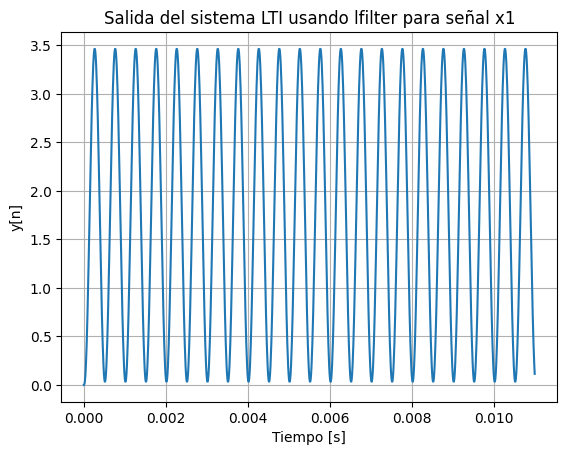

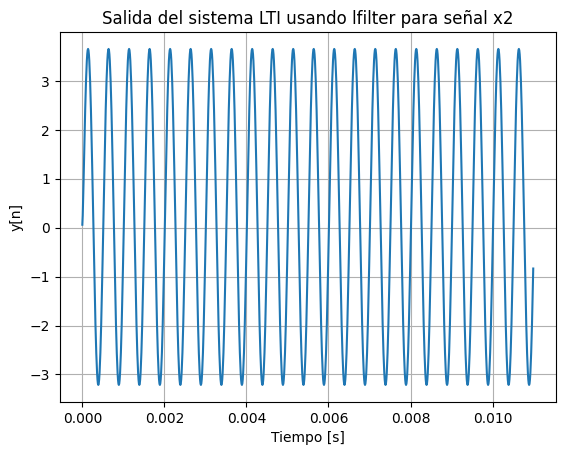

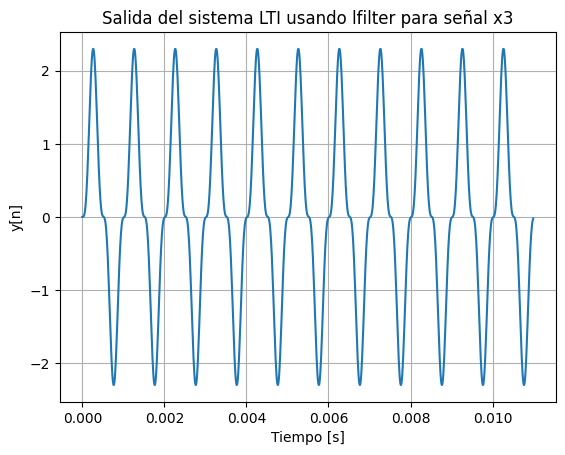

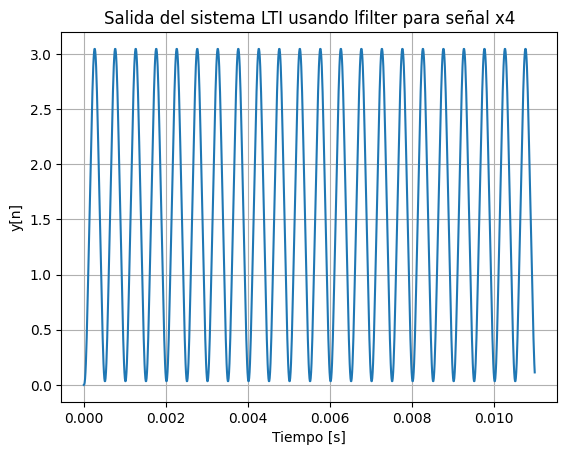

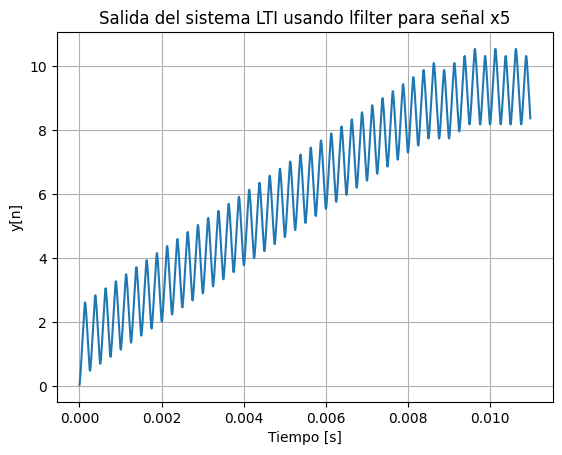

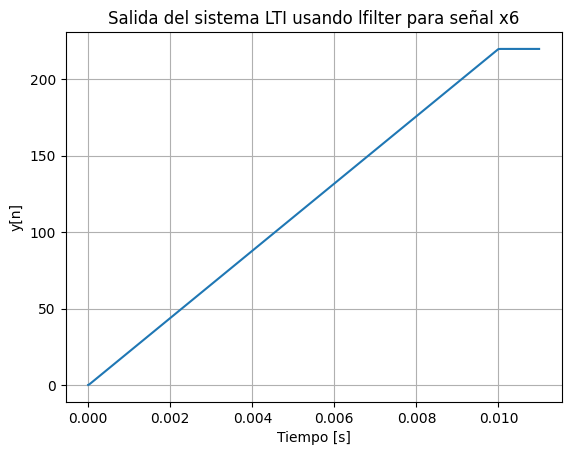

In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Aug 31 17:13:20 2025

@author: lucas-douat
"""

import numpy as np
import matplotlib.pyplot as plt
from ts1 import x1,x2,x3,x4,x5,x6
from scipy.signal import lfilter, square

#%%#%% 1) Ecuación en diferencia que modela un sistema LTI:

# Parámetros de simulación
fs = 100000  # frecuencia de muestreo en Hz
ts = 1 / fs  # tiempo entre muestras
N =  1100    # número de muestras
tt = np.linspace(0, (N-1)*ts,N).flatten()


# Coeficientes del sistema LTI
# y[n] = 0.03*x[n] + 0.05*x[n-1] + 0.03*x[n-2] + 1.5*y[n-1] - 0.5*y[n-2]
b = [0.03, 0.05, 0.03]  # coeficientes de entrada (numerador)
a = [1, -1.5, 0.5]      # coeficientes de salida (denominador)

#Aplicar lfilter a cada señal
señales = [x1, x2, x3, x4, x5, x6]
nombres = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']

for i, x in enumerate(señales):
    y = lfilter(b, a, x)
    plt.figure()
    plt.plot(tt, y)
    plt.title(f"Salida del sistema LTI usando lfilter para señal {nombres[i]}")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("y[n]")
    plt.grid(True)
    plt.show()

Implementación de un **Algoritmo** para representar mi sistema LTI

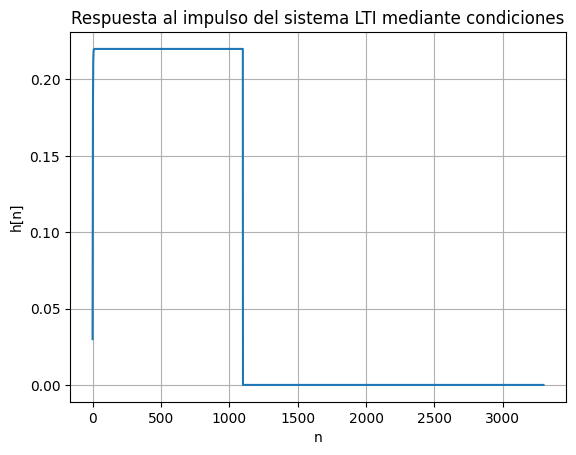

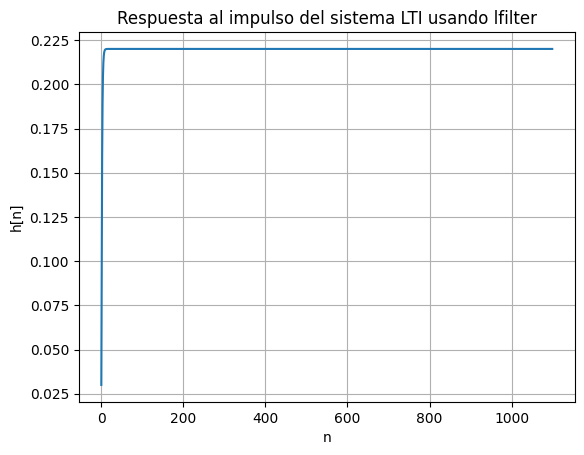

In [5]:
# Sistema LTI  usando condiciones
def sistema_lti(x):
    N = len(x)
    y = np.zeros(2*N+(N-1))
    #y = np.zeros(N)
    
    for n in range(N):
        #Condiciones para acceder a posiciones validas de las listas.
        x_n   = x[n] if n >= 0 else 0
        x_n1  = x[n-1] if n-1 >= 0 else 0
        x_n2  = x[n-2] if n-2 >= 0 else 0
        y_n1  = y[n-1] if n-1 >= 0 else 0
        y_n2  = y[n-2] if n-2 >= 0 else 0
        
        y[n] = 0.03*x_n + 0.05*x_n1 + 0.03*x_n2 + 1.5*y_n1 - 0.5*y_n2
    
    return y

# Impulso Unitaroio
impulso = np.zeros(N)
impulso[0] = 1  # impulso unitario

h1 = sistema_lti(impulso)
tt2 = np.linspace(0, (2*N+(N-1))*ts,2*N+(N-1)).flatten()

# Graficar
plt.plot(range(len(h1)),h1)
plt.title("Respuesta al impulso del sistema LTI mediante condiciones")
plt.xlabel("n")
plt.ylabel("h[n]")
plt.grid(True)
plt.show()

h2 = lfilter(b,a,impulso)

# Graficar
plt.plot(range(len(h2)),h2)
plt.title("Respuesta al impulso del sistema LTI usando lfilter")
plt.xlabel("n")
plt.ylabel("h[n]")
plt.grid(True)
plt.show()

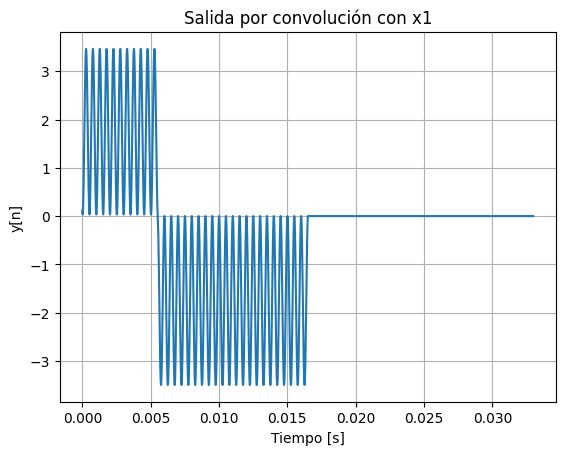

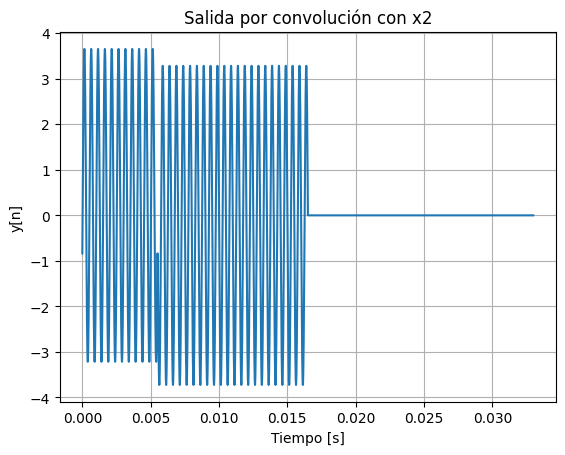

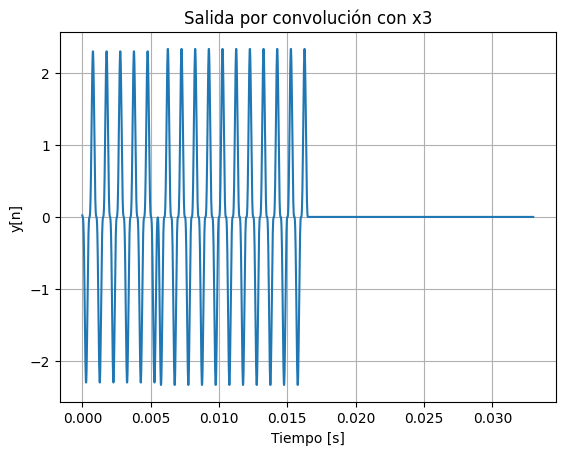

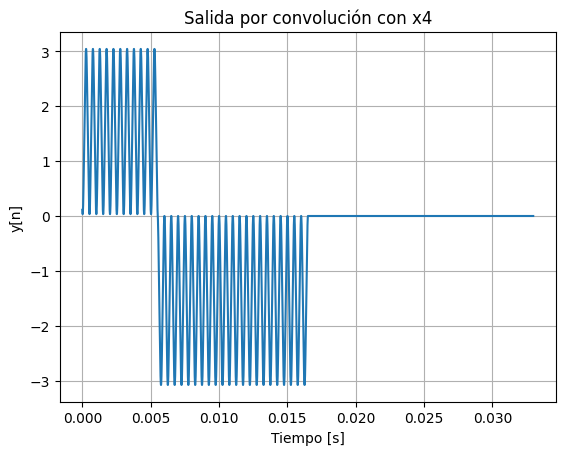

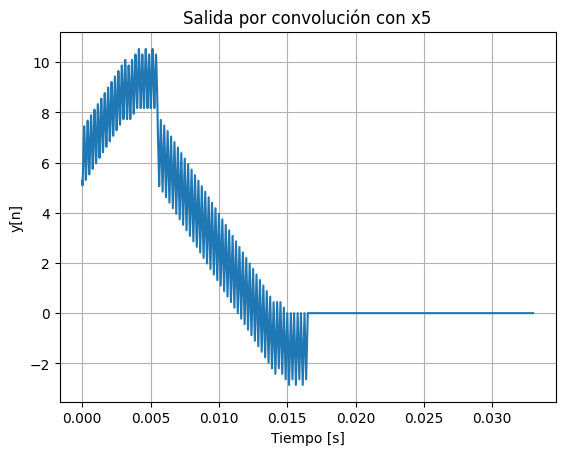

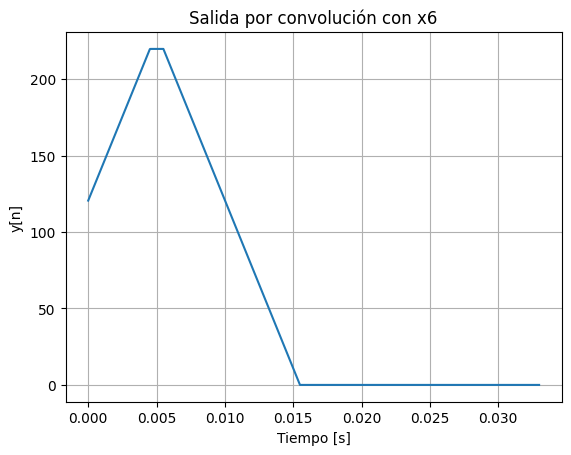

In [6]:
#%% Convolución con señales
señales = [x1, x2, x3, x4, x5, x6]
labels = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']

for i, x in enumerate(señales):
    y_conv = np.convolve(x, h1, mode='same')
    plt.figure()
    plt.plot(tt2,y_conv)
    plt.title(f"Salida por convolución con {labels[i]}")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("y[n]")
    plt.grid(True)
    plt.show()

## 🧠 Importancia de la Cantidad de Muestras en Simulación de Sistemas LTI

La cantidad de muestras `N` influye directamente en la calidad de la simulación:

- **Resolución temporal**: Un `N` mayor permite observar mejor la evolución de señales y respuestas prolongadas.
- **Resolución espectral**: Aumentar `N` mejora la precisión en frecuencia, ya que Δf = fs / N.
- **Evitar truncamiento**: En sistemas recursivos o al aplicar convolución, un `N` pequeño puede cortar la respuesta antes de que se desarrolle completamente.

🔁 **Recomendación**: Usar `N ≥ 10000` junto con **zero-padding** asegura que la respuesta al impulso y la salida del sistema se representen correctamente, sin pérdida de información.



## ✅ Conclusiones

Durante el trabajo implementé un sistema LTI definido por una ecuación en diferencias y lo apliqué a distintas señales de entrada. Esto permitió observar cómo varía la salida según la forma, frecuencia y duración de cada señal.

La comparación entre la **respuesta al impulso obtenida con `lfilter`** y la **implementación manual** mostró diferencias importantes:

- La versión manual mantiene la respuesta constante durante más muestras, lo que puede reflejar una mejor preservación de la dinámica del sistema.
- `lfilter` estabiliza rápidamente la salida, lo que puede deberse a cómo gestiona internamente las condiciones iniciales y la cantidad de muestras disponibles.

Esto sugiere que `lfilter` puede **truncar la respuesta** si no se aplica correctamente el **zero-padding**, lo que afecta la fidelidad de la simulación. Por eso, se recomienda extender las señales para asegurar que la respuesta completa se desarrolle.

En síntesis, el trabajo permitió consolidar conceptos como:
- Modelado de sistemas LTI
- Respuesta al impulso
- Convolución
- Potencia y energía
- Zero-padding
- Comparación entre métodos de simulación

## 🧠 Autoevaluación del aprendizaje

Durante el desarrollo de este trabajo logré afianzar conceptos clave sobre sistemas LTI y su implementación en entornos digitales:

- Comprendí cómo aplicar ecuaciones en diferencias para modelar sistemas LTI, tanto con `scipy.signal.lfilter` como mediante una función propia que considera condiciones iniciales.
- Aprendí a calcular y graficar la **respuesta al impulso**, entendiendo su rol fundamental en la caracterización de sistemas.
- Reforcé la diferencia entre **energía** y **potencia**, y su aplicación según el tipo de señal.
- Experimenté con señales reales (senoidal, cuadrada, modulada, pulso) y observé cómo se comportan al pasar por sistemas LTI.
- Incorporé el uso de **zero-padding** para evitar truncamiento y mejorar la resolución temporal y espectral.

Además, este trabajo me permitió mejorar el manejo de herramientas como **Spyder** y **Jupyter Notebook**, aprendiendo a depurar código, interpretar errores como el desajuste de dimensiones en `matplotlib`, y validar resultados mediante gráficos.

Utilicé Copilot como apoyo para:
- Consultar conceptos teóricos sobre sistemas LTI, convolución y respuesta al impulso.
- Interpretar diferencias entre métodos de simulación (`lfilter` vs implementación manual).
- Resolver dudas sobre cómo aplicar padding correctamente y ajustar vectores de tiempo.
- Validar fórmulas matemáticas y estructuras de código en Python.
